In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import datetime as dt


In [4]:
coffee_data=pd.read_csv("/content/index (1).csv")

In [ ]:
data.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [5]:
coffee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


In [6]:
coffee_data.isnull().sum()

,0
date,0
datetime,0
cash_type,0
card,89
money,0
coffee_name,0


In [7]:
coffee_data.duplicated().sum()

0

In [8]:
coffee_data.describe()

,money
count,1133.000000
mean,33.105808
std,5.035366
min,18.120000
25%,28.900000
50%,32.820000
75%,37.720000
max,40.000000


In [9]:
coffee_data.loc[:,['cash_type','card','coffee_name']].describe().T


,count,unique,top,freq
cash_type,1133,2,card,1044
card,1044,446,ANON-0000-0000-0012,88
coffee_name,1133,8,Americano with Milk,268


1. there are no duplicates in any column
2. 89 missing values in the column 'card' is present
3. there are 1044 transactions in the data
4. 2 unique values of cash_type
5. 8 different coffee_types with americano with milk as a famous one






---



In [10]:
# lets check the null values in card column
coffee_data[coffee_data['card'].isnull()]['cash_type'].value_counts()

,count
cash_type,
cash,89


all of the transactions which are null through card are from cash users


<Axes: >

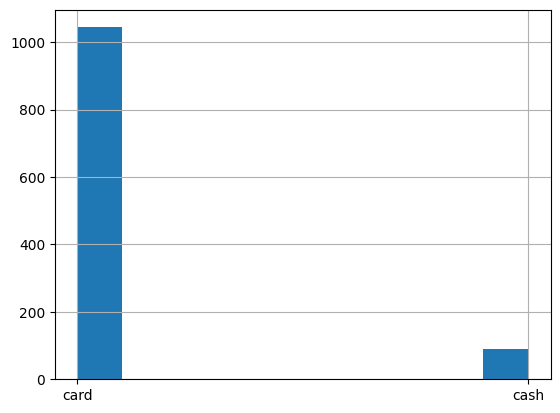

In [11]:
coffee_data['cash_type'].hist()

In [12]:
coffee_data['cash_type'].value_counts(normalize=True)

,proportion
cash_type,
card,0.921447
cash,0.078553


so 92% users transactiuons are through card

In [13]:
pd.DataFrame(coffee_data['coffee_name'].value_counts(normalize=True).sort_values(ascending=False).round(4)*100)

,proportion
coffee_name,
Americano with Milk,23.65
Latte,21.45
Cappuccino,17.30
Americano,14.92
Cortado,8.74
Hot Chocolate,6.53
Espresso,4.32
Cocoa,3.09


so we can now say that americano with milk and latte are the most famous products for us and cappuccino ,americano are second tier whereas cortado,hot chocolate,espresso,cocoa are the last

In [14]:
#now lets conduct data transformations for further analysis

In [62]:
coffee_data['date']=pd.to_datetime(coffee_data['date'])
coffee_data['datetime']=pd.to_datetime(coffee_data['datetime'])
coffee_data['month']=coffee_data['date'].dt.strftime('%y-%m')
coffee_data['day']=coffee_data['date'].dt.strftime('%w')
coffee_data['hour']=coffee_data['datetime'].dt.strftime('%H')


In [15]:
coffee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


In [58]:
coffee_data.head()

,date,datetime,cash_type,card,money,coffee_name,month,day,hour
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,24-03,5,00
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,24-03,5,00
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,24-03,5,00
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,24-03,5,00
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,24-03,5,00


In [17]:
coffee_data['date'].min()


'2024-03-01'

In [18]:
coffee_data['date'].max()

'2024-07-31'

lets first check overall revenue by products

In [34]:
revenue_data=coffee_data.groupby(['coffee_name']).sum(['money']).reset_index().sort_values(by='money',ascending=False)

Text(0.5, 0, 'revenue')

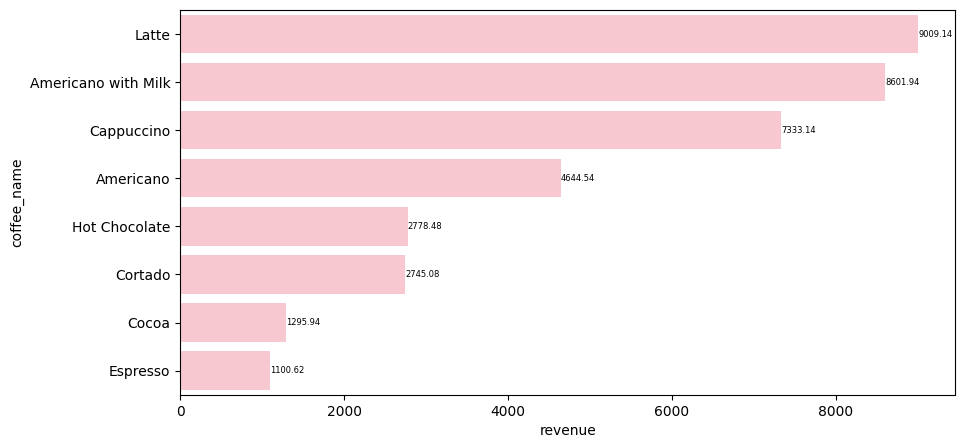

In [35]:
plt.figure(figsize=(10,5))
ax=sns.barplot(data=revenue_data,x='money',y='coffee_name',color='pink')
ax.bar_label(ax.containers[0],fontsize=6)
plt.xlabel('revenue')

latte is the product with the highest revenue whereas espresso is the last one .lets check the monthly one

In [36]:
monthly_sales=coffee_data.groupby(['coffee_name','month']).count()['date'].reset_index().rename(columns={'date':'count'}).pivot(index='month',columns='coffee_name',values='count').reset_index()

In [37]:
monthly_sales

coffee_name,month,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,24-03,36,34,20,6,30,10,22,48
1,24-04,35,42,43,6,19,7,13,31
2,24-05,48,58,55,9,17,8,14,58
3,24-06,14,69,46,5,19,10,14,50
4,24-07,36,65,32,9,14,14,11,56


In [38]:
monthly_sales.describe().T.loc[:,['min','max']]

,min,max
coffee_name,,
Americano,14.0,48.0
Americano with Milk,34.0,69.0
Cappuccino,20.0,55.0
Cocoa,5.0,9.0
Cortado,14.0,30.0
Espresso,7.0,14.0
Hot Chocolate,11.0,22.0
Latte,31.0,58.0


([<matplotlib.axis.XTick at 0x7de808a3ab90>,
 [Text(0, 0, '24-03'),
  Text(1, 0, '24-04'),
  Text(2, 0, '24-05'),
  Text(3, 0, '24-06'),
  Text(4, 0, '24-07')])

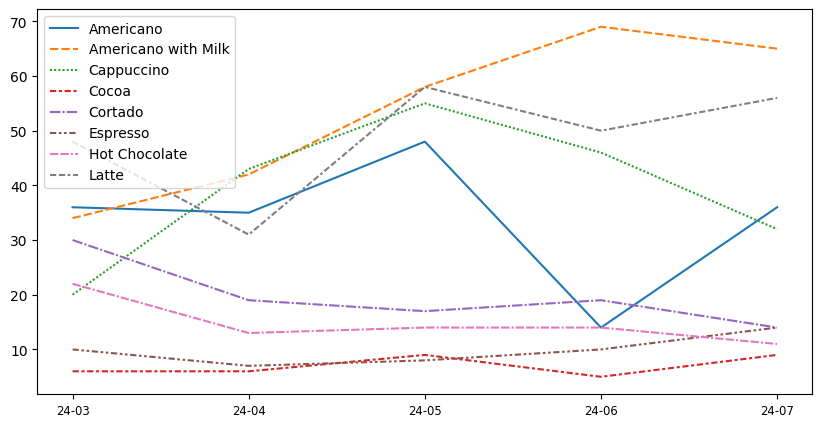

In [40]:
plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_sales)
plt.legend(loc='upper left')
plt.xticks(range(len(monthly_sales['month'])),monthly_sales['month'],size='small')

Americano with Milk,latte and cappuccino are the top selling types cocoa and espresso are the lowest happening sales additionally americano with milk and latte shows the upward trends

In [42]:
weekday_sales=coffee_data.groupby(['day']).count()['date'].reset_index().rename(columns={'date':'count'})
weekday_sales

,day,count
0,0,151
1,1,151
2,2,185
3,3,165
4,4,164
5,5,163
6,6,154


([<matplotlib.axis.XTick at 0x7de807027fd0>,
 [Text(0, 0, 'sun'),
  Text(1, 0, 'mon'),
  Text(2, 0, 'tues'),
  Text(3, 0, 'wed'),
  Text(4, 0, 'thur'),
  Text(5, 0, 'fri'),
  Text(6, 0, 'sat')])

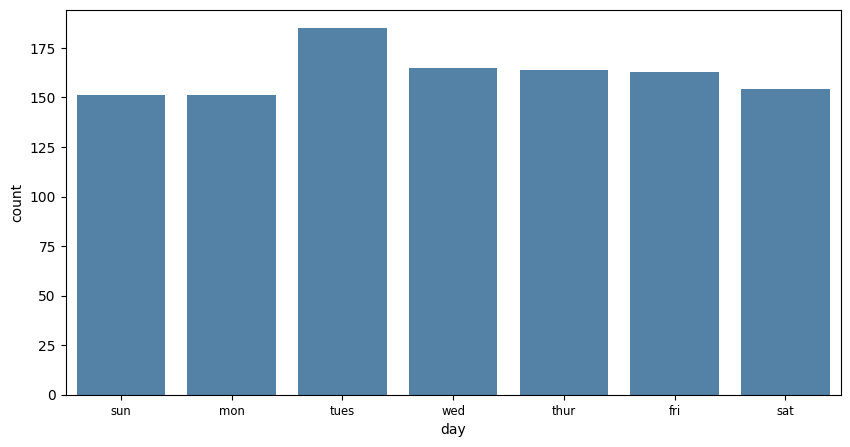

In [47]:
plt.figure(figsize=(10,5))
sns.barplot(data=weekday_sales,x='day',y='count',color='steelblue')
plt.xticks(range(len(weekday_sales['day'])),['sun','mon','tues','wed','thur','fri','sat'],size='small')



so bar chart reveals tuesday has the most number of sales than others

In [48]:
daily_sales=coffee_data.groupby(['coffee_name','date']).count()['datetime'].reset_index().rename(columns={'datetime':'count'}).pivot(index='date',columns='coffee_name',values='count').reset_index().fillna(0)

In [49]:
daily_sales

coffee_name,date,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,2024-03-01,1.0,4.0,0.0,1.0,0.0,0.0,3.0,2.0
1,2024-03-02,3.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2024-03-03,1.0,2.0,0.0,1.0,2.0,0.0,2.0,2.0
3,2024-03-04,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0
4,2024-03-05,0.0,0.0,0.0,1.0,1.0,0.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...
145,2024-07-27,0.0,5.0,4.0,0.0,0.0,2.0,0.0,2.0
146,2024-07-28,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
147,2024-07-29,3.0,2.0,2.0,1.0,0.0,0.0,2.0,1.0
148,2024-07-30,2.0,12.0,2.0,0.0,3.0,2.0,0.0,3.0


In [50]:
daily_sales.iloc[:,1:].describe().T.loc[:,['min','max']]


,min,max
coffee_name,,
Americano,0.0,5.0
Americano with Milk,0.0,12.0
Cappuccino,0.0,9.0
Cocoa,0.0,2.0
Cortado,0.0,4.0
Espresso,0.0,4.0
Hot Chocolate,0.0,4.0
Latte,0.0,7.0


In [63]:
hourly_sales=coffee_data.groupby(['hour']).count()['datetime'].reset_index().rename(columns={'datetime':'count'})

In [64]:
hourly_sales

,hour,count
0,07,13
1,08,44
2,09,50
3,10,133
4,11,103
5,12,87
6,13,78
7,14,76
8,15,65
9,16,77


<Axes: xlabel='hour', ylabel='count'>

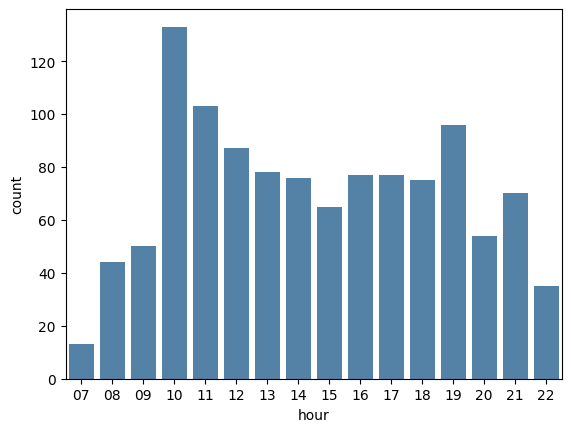

In [69]:
sns.barplot(data=hourly_sales,x='hour',y='count',color='steelblue')

overall two peaks are observed in each day .one is the coffee vending machine is busy at 10:am in the morning and 7:00 pm in the evening Now lets check if any difference for the products

In [70]:
hourly_sales_by_coffee=coffee_data.groupby(['hour','coffee_name']).count()['date'].reset_index().rename(columns={'date':'count'}).pivot(index='hour',columns='coffee_name',values='count').fillna(0).reset_index()

In [71]:
hourly_sales_by_coffee

coffee_name,hour,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,07,5.0,4.0,1.0,0.0,1.0,0.0,0.0,2.0
1,08,10.0,7.0,8.0,1.0,6.0,0.0,0.0,12.0
2,09,8.0,16.0,6.0,1.0,5.0,3.0,0.0,11.0
3,10,20.0,31.0,10.0,4.0,8.0,2.0,7.0,51.0
4,11,21.0,25.0,16.0,1.0,13.0,6.0,8.0,13.0
5,12,14.0,26.0,15.0,3.0,7.0,6.0,3.0,13.0
6,13,18.0,18.0,10.0,2.0,12.0,3.0,4.0,11.0
7,14,15.0,18.0,13.0,4.0,6.0,5.0,2.0,13.0
8,15,14.0,15.0,8.0,0.0,3.0,4.0,6.0,15.0
9,16,10.0,18.0,12.0,3.0,12.0,5.0,4.0,13.0


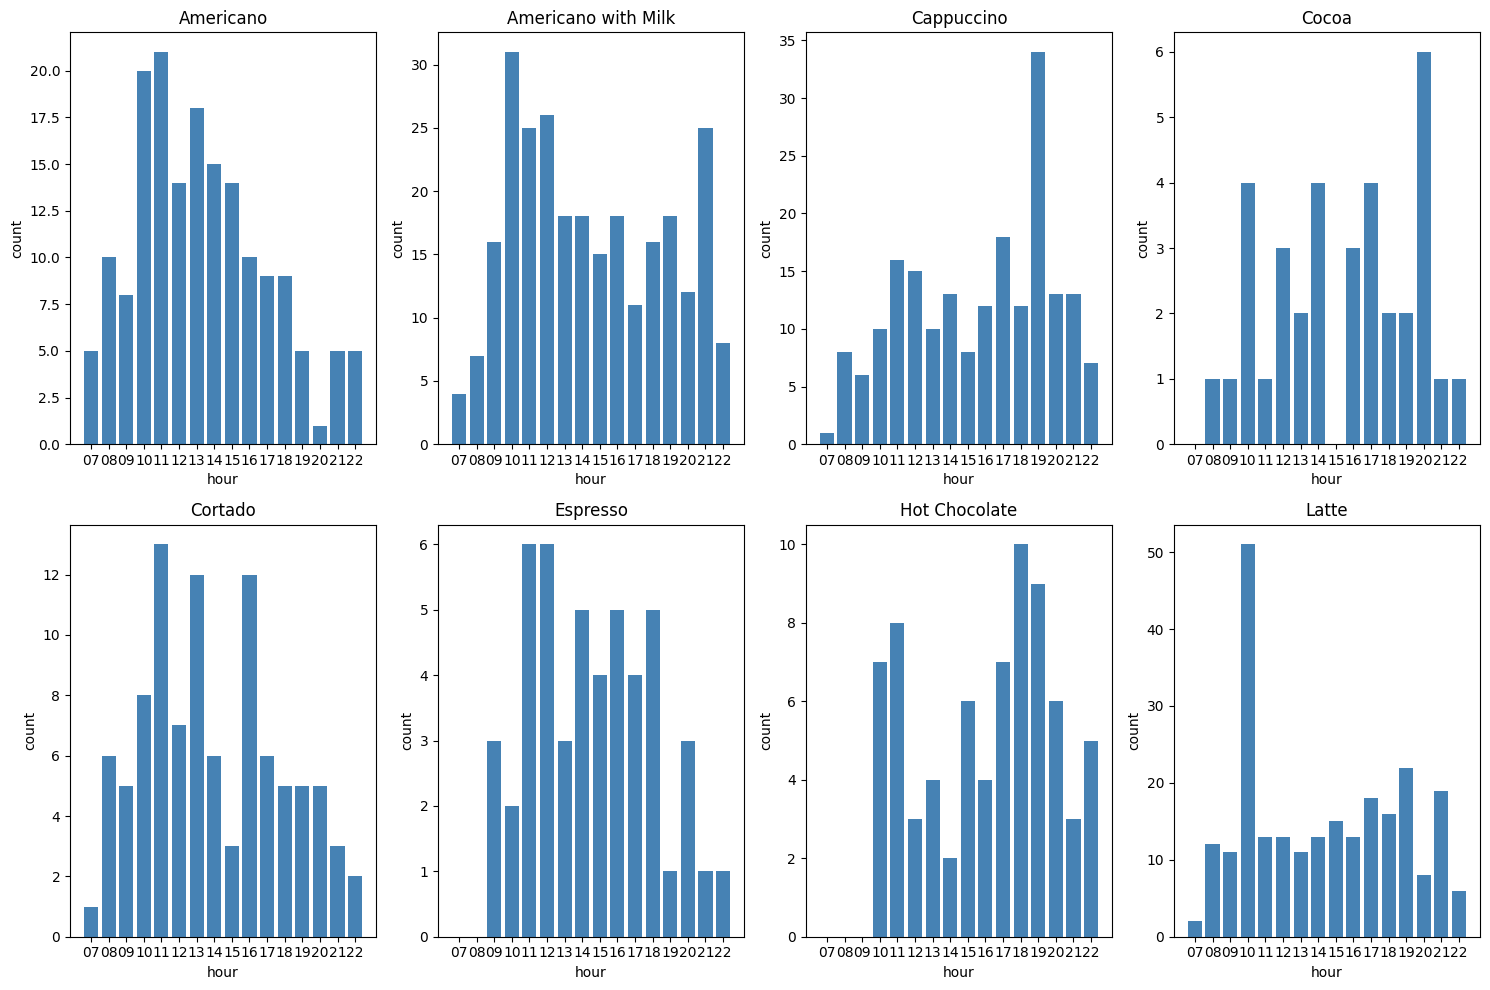

In [73]:
fig,axs=plt.subplots(2,4,figsize=(15,10))
axs=axs.flatten()
for i,column in enumerate (hourly_sales_by_coffee.columns[1:]):

    axs[i].bar(hourly_sales_by_coffee['hour'],hourly_sales_by_coffee[column],color='steelblue')
    axs[i].set_title(f'{column}')
    axs[i].set_xlabel('hour')
    axs[i].set_ylabel('count')
plt.tight_layout()
plt.show()

The plots above illustrate the shopping traffic for each product throughout the day .notably all products experience a peak in traffic around 10:am in the morning with this trend being particularly pronounced for latte .additionally cappiccuno,cocoa and hot chocolate tend to be more popular during the evening hours especially between 6:00pm and 8:00 pm

#conclusion
From the analysis above, we have uncovered valuable insights into customer shopping patterns on a daily and weekly basis. We have identified the most popular coffee products and observed the shopping
trends over time. These findings are instrumental in optimizing inventory planning, designing the layout of vending machines, and determining the ideal restock times for coffee products.


